In [4]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


In [11]:
draw =pd.read_excel('/Volumes/WDC_internal/Users/bell/in_and_outbox/Ongoing_Analysis/M2_IntegratedTemp/ht_anomaly_M2/M2_htcontent_anom.xlsx',
                  sheet_name='all_incl_2018prawler',parse_dates=['time'], index_col='time')


In [38]:
class Timeseries1varPlot(object):

    mpl.rcParams['svg.fonttype'] = 'none'
    mpl.rcParams['ps.fonttype'] = 42
    mpl.rcParams['pdf.fonttype'] = 42

    def __init__(self, fontsize=10, labelsize=10, plotstyle='k-.', stylesheet='bmh'):
        """Initialize the timeseries with items that do not change.

        This sets up the axes and station locations. The `fontsize` and `spacing`
        are also specified here to ensure that they are consistent between individual
        station elements.

        Parameters
        ----------
        fontsize : int
            The fontsize to use for drawing text
        labelsize : int
          The fontsize to use for labels
        stylesheet : str
          Choose a mpl stylesheet [u'seaborn-darkgrid', 
          u'seaborn-notebook', u'classic', u'seaborn-ticks', 
          u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', 
          u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', 
          u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', 
          u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', 
          u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', 
          u'seaborn-dark-palette']
        """

        self.fontsize = fontsize
        self.labelsize = labelsize
        self.plotstyle = plotstyle
        plt.style.use(stylesheet)

    @staticmethod
    def add_title(mooringid='',lat=-99.9,lon=-99.9,depth=9999,instrument=''):
      """Pass parameters to annotate the title of the plot

      This sets the standard plot title using common meta information from PMEL/EPIC style netcdf files

      Parameters
      ----------
      mooringid : str
        Mooring Identifier
      lat : float
        The latitude of the mooring
      lon : float
        The longitude of the mooring
      depth : int
        Nominal depth of the instrument
      instrument : str
        Name/identifier of the instrument plotted
      """  

      ptitle = ("Plotted on: {time:%Y/%m/%d %H:%M} \n from {mooringid} Lat: {latitude:3.3f}  Lon: {longitude:3.3f}" 
            " Depth: {depth}\n : {instrument}").format(
            time=datetime.datetime.now(), 
                  mooringid=mooringid,
                  latitude=lat, 
                  longitude=lon, 
                  depth=depth,
                  instrument=instrument )

      return ptitle

    def plot(self, xdata=None, ydata=None, ylabel=None, **kwargs):
      fig = plt.figure(1,figsize=(11,4.25))
      ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
      p1 = ax1.plot(xdata, ydata, self.plotstyle, markersize=2)
      ax1.set_ylim([np.nanmin(ydata),np.nanmax(ydata)])
      ax1.set_xlim([np.nanmin(xdata),np.nanmax(xdata)])
      plt.ylabel(ylabel)

    
      ax1.xaxis.set_major_locator(YearLocator())
      ax1.xaxis.set_minor_locator(YearLocator(2, month=7, day=1))
      ax1.xaxis.set_major_formatter(ticker.NullFormatter())
      ax1.xaxis.set_minor_formatter(DateFormatter('%Y'))
      ax1.xaxis.set_ticks_position('bottom')
      ax1.yaxis.set_ticks_position('both')
      ax1.tick_params(axis='both', which='minor', labelsize=self.labelsize)

      return plt, fig

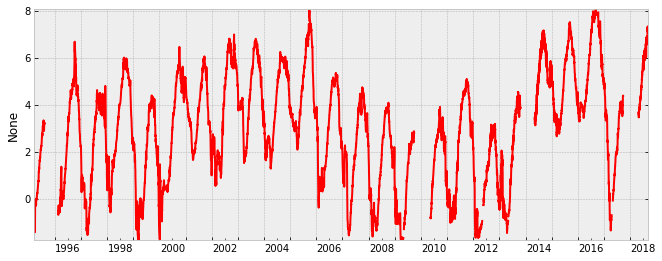

In [42]:
p1 = Timeseries1varPlot(plotstyle='r-')

dr = draw.resample('6h').mean()
temp = np.array([x.toordinal() for x in dr.index])    
plt1, fig1 = p1.plot(xdata=temp, 
                     ydata=dr['V00_1900_depthint'].values)

In [43]:
fig1.savefig('M2_DepthAveTemp.svg',dpi=300)